***DSCI 100 Final Report (002 Group 12)***
by Kenneth Ahn, Alex Ronczewski, Ryan Zhang, Natalie Viegas


In this report, a dataset based on UBC’s minecraft server “Plaicraft” was created and distributed to DSCI 100 students to answer questions regarding the results of the dataset. The broad question we decided to answer was "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?". Specifying our broad question further, we decided on our report question to be "Can experience level predict whether a player subscribes to a game-related newsletter in the "Players" dataset?". Delving deeper into the “Players” dataset, there are 7 variables, 196 observations and a multitude of columns describing different aspects of the data acquired from “Plaicraft”. These variables include, (test aklsdjf)

Continue intro above

Question (Add more)

**Can experience level predict whether a player subscribes to a game-related newsletter in the "Players" dataset?"**

Methods & Results (Add more)
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.


In [1]:
#Load the necessary libraries and set the matrix max rows to 6. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Load the dataset into R using the raw file from Github
players <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/players.csv")
players

sessions <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Table 1: Variable Descriptions for the Players Dataset

This dataset has 196 observations and 7 Variables. 

| Variable Name | Variable Type | Description                                                         | 
|---------------|---------------|---------------------------------------------------------------------|
|experience     |character      |Player's experience level (Beginner, Amateur, Regular, Veteran, Pro) |
|subscribe      | logical       | Whether the player has subscribed to the newsletter (TRUE or FALSE) |
|hashedEmail    | character     |   Player's identifier                                               |
|played_hours   |  double       | Player's total number of hours played                               |
|name           | character     |   Player's name                                                     |
|gender         |  character    |   Player's gender (Male or Female)                                  |
|Age            |    double     |    Player's age                                                     |

#### Table 2: Variable Descriptions for the Sessions Dataset

This dataste has 1535 Observations and 5 variables

| Variable Name      | Variable Type | Description                                                         | 
|--------------------|---------------|---------------------------------------------------------------------|
|hashedEmail         | character     |   Player's identifier                                               |
|start_time          |  character    |   Character string representing start time of players sessions      |
|end_time            | character     |   Character string representing end time of players sessions        |
|original_start_time |  double       |   Numerical Value representing player start time                    |
|original_end_time   |    double     |   Numerical Value representing player end time                      |

In [8]:
#sumamry statistics for the players dataset
#summary(players)
#sumamry statistics of sessions dataset
#summary(sessions)

#We can add this if we want, but for me concrete summary stats check below

subscribed_players,not_subscribed_players
<int>,<int>
144,52


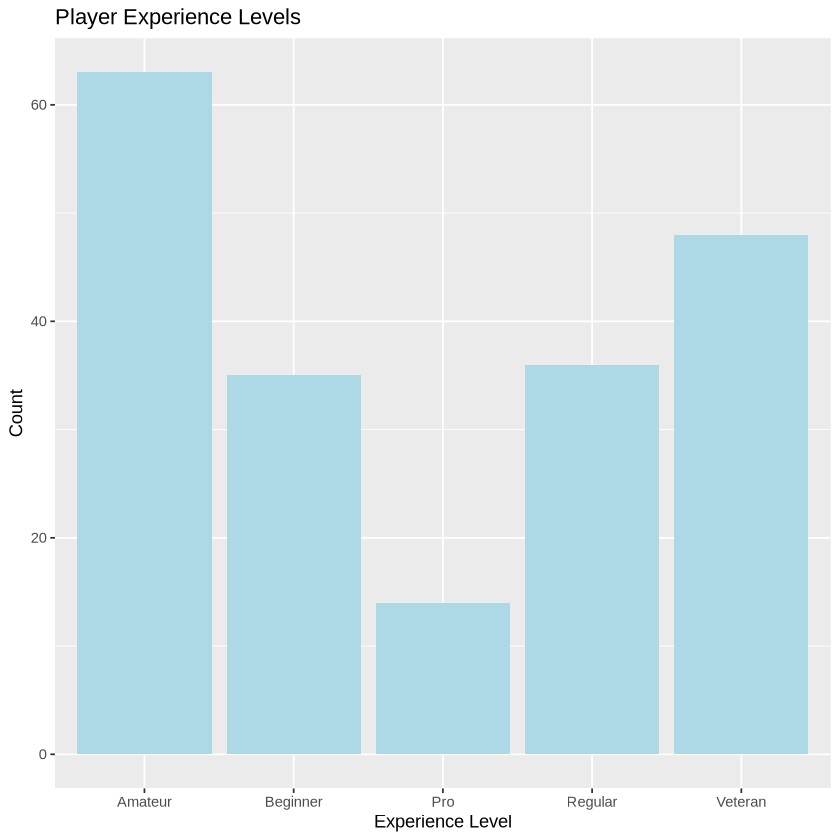

In [16]:
#More specific summary stats for our question

#Distribution of experience levels of players
experience_summary <- players |> 
  count(experience, name = "count")
#experience_summary

experience_plot <- ggplot(players, aes(x = experience)) +
  geom_bar(fill = "lightblue") +
  labs(
    title = "Player Experience Levels",
    x = "Experience Level",
    y = "Count") 

experience_plot

#Distribution of subscriptions for our question levels of players

subscription_summary <- players |> 
  summarize(subscribed_players = sum(subscribe, na.rm = TRUE),
    not_subscribed_players = sum(!subscribe, na.rm = TRUE))

subscription_summary


**Tidying the data**

Possible issues

`For players.csv`
- Remove NA data from age. 
- Make sure that the data is in a tidy format
- Convert Gender and Experience to a factor variable
- Change experience to a qualitative variable from 1-5

As for `sessions.csv`
- Check for missing values/duplicates.
- Make sure that the data is in a tidy format
- start_time and end_time could be converted to a different date time format with lubridate (might be too much for intial project proposal) and then changing original_start_timeand original_end_time to be consistenct. 

In [20]:
#Cleaning for players.csv
players <- players |> 
  filter(!is.na(Age)) |>  # Remove NA values for Age
  mutate(
    experience = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur" ~ 2,
      experience == "Regular" ~ 3,
      experience == "Veteran" ~ 4,
      experience == "Pro" ~ 5),  # Map experience levels to numeric values
    gender = as.factor(gender)) |> # Convert gender to factor
  mutate(experience = as.factor(experience))  # Convert numeric experience back to factor

players


#Make a new datafrome to find duplicates 
duplicates <- sessions |> 
  group_by(hashedEmail, start_time, end_time) |> 
  filter(n() > 1)
#duplicates

#Make a new datafrome to find duplicates 
missing_values <- sessions |>
  filter(is.na(start_time), is.na(end_time), is.na(hashedEmail), is.na(original_start_time), is.na(original_end_time))
#missing_values

#check if start time is before endtime 
sessions <- sessions |> 
  filter(start_time < end_time)
sessions 

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
NA,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
NA,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
NA,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
NA,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
NA,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


We found no duplicates/missing values in the data and the  five rows where start_time < end_time which have been removed. We can continue with our analysis. 